In [1]:
import pandas_datareader.data as web
import datetime

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import plotly.express as px
import plotly.graph_objects as go


In [4]:
start = datetime.datetime(2001, 1, 1)

end = datetime.datetime(2020, 7, 10)

df = web.DataReader("^BSESN", 'yahoo', start, end)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 7 columns):
Date         4803 non-null object
High         4803 non-null float64
Low          4803 non-null float64
Open         4803 non-null float64
Close        4803 non-null float64
Volume       4803 non-null float64
Adj Close    4803 non-null float64
dtypes: float64(6), object(1)
memory usage: 262.8+ KB


In [6]:
df.describe()

High           Low          Open         Close        Volume  \
count   4803.000000   4803.000000   4803.000000   4803.000000  4.803000e+03   
mean   18174.108325  17920.204577  18064.469293  18044.307917  8.178878e+04   
std    10876.461806  10774.347839  10839.676920  10821.310016  1.079919e+06   
min     2682.590088   2594.870117   2621.889893   2600.120117  0.000000e+00   
25%     8508.479980   8277.419922   8406.794922   8436.064941  9.200000e+03   
50%    17548.130859  17308.279297  17449.929688  17440.869141  1.380000e+04   
75%    26816.264648  26493.759766  26694.580078  26653.205078  2.080000e+04   
max    42273.871094  41850.289062  42263.000000  41952.628906  3.181510e+07   

          Adj Close  
count   4803.000000  
mean   18044.307917  
std    10821.310016  
min     2600.120117  
25%     8436.064941  
50%    17440.869141  
75%    26653.205078  
max    41952.628906

In [7]:
df.head()

Date         High          Low         Open        Close  Volume  \
0  2001-01-02  4028.570068  3929.370117  3953.219971  4018.879883     0.0   
1  2001-01-03  4067.659912  3977.580078  3977.580078  4060.020020     0.0   
2  2001-01-04  4180.970215  4109.549805  4180.970215  4115.370117     0.0   
3  2001-01-05  4195.009766  4115.350098  4116.339844  4183.729980     0.0   
4  2001-01-08  4206.720215  4101.529785  4164.759766  4120.430176     0.0   

     Adj Close  
0  4018.879883  
1  4060.020020  
2  4115.370117  
3  4183.729980  
4  4120.430176

### an interactive line graph of the sensex from 2001 to 2020.

In [8]:
fig = px.line(df,y="Close")
fig.show()

### A candle stick plot of sensex from 2001 to 2020

In [9]:
plt.figsize=(15,8)
fig = go.Figure(data=[go.Candlestick(x=df.reset_index()['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

### feature engineering returns/ day and RSI

In [8]:
df["daily_return"]=df["Close"].pct_change()

In [9]:
rsi_period=14
def rsi(df):
    gain=df["daily_return"].mask(df["daily_return"]<0,0)
    loss=df["daily_return"].mask(df["daily_return"]>0,0)
    avg_gain=gain.ewm(com=rsi_period-1,min_periods=rsi_period).mean()
    avg_loss=loss.ewm(com=rsi_period-1,min_periods=rsi_period).mean()
    rs=abs(avg_gain/avg_loss)
    return 100-100/(1+rs)

In [10]:
df["rsi"]=rsi(df)

### creating moving average as a feature to define the trends

In [11]:
df['SMA_10'] = df["Close"].rolling(10).mean()

In [12]:
df['SMA_20'] = df["Close"].rolling(20).mean()

In [13]:
df['SMA_50'] = df["Close"].rolling(50).mean()

In [14]:
df['SMA_100'] = df["Close"].rolling(100).mean()

In [15]:
df['SMA_200'] = df["Close"].rolling(200).mean()

### creating log of volume because some values are extremely large and is messing up the graph

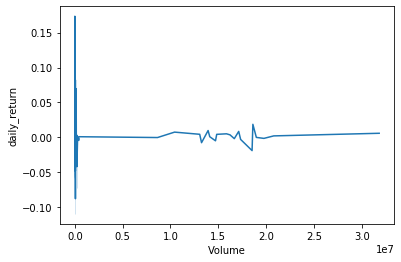

In [16]:
sns.lineplot(x="Volume",y="daily_return",data=df)

#### the volume data of the sensex was captured as "0" from 2001 to 2003. Therefore, i removed the rows and considered my data from 2003 onwards

In [35]:
df=df[df["Volume"]!=0]

In [36]:
from math import log
df["log_volume"]=df["Volume"].apply(log)

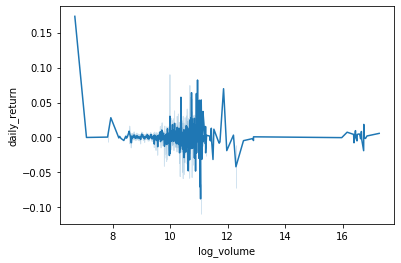

In [37]:
sns.lineplot(x="log_volume",y="daily_return",data=df)

In [38]:
df.tail()

High           Low          Open         Close   Volume  \
Date                                                                          
2020-07-06  36661.660156  36254.019531  36313.460938  36487.281250  22300.0   
2020-07-07  36723.269531  36271.089844  36660.351562  36674.519531  20600.0   
2020-07-08  36828.429688  36234.171875  36738.378906  36329.011719  24800.0   
2020-07-09  36806.300781  36422.300781  36450.691406  36737.691406  17400.0   
2020-07-10  36748.890625  36401.109375  36555.128906  36594.328125  20900.0   

               Adj Close  daily_return        rsi        SMA_10        SMA_20  \
Date                                                                            
2020-07-06  36487.281250      0.012933  71.150704  35395.695312  34683.650000   
2020-07-07  36674.519531      0.005132  72.142970  35520.104297  34819.541406   
2020-07-08  36329.011719     -0.009421  67.549512  35666.107422  34923.639453   
2020-07-09  36737.691406      0.011249  70.005405  35855.666406  35083.605469   
2020-07-10  36594.328125     -0.003902  68.080573  35997.972266  35224.277344   

                  SMA_50       SMA_100       SMA_200  log_volume  
Date                                                              
2020-07-06  33075.268555  33788.190605  36925.268018   10.012342  
2020-07-07  33182.214531  33741.875488  36922.913369    9.933046  
2020-07-08  33273.933164  33693.747090  36918.204326   10.118599  
2020-07-09  33366.396602  33651.327793  36916.371377    9.764225  
2020-07-10  33443.879961  33605.109668  36912.418076    9.947504

### Data Cleaning

In [40]:
df.head()

High          Low         Open        Close   Volume  \
Date                                                                      
2003-07-14  3726.560059  3704.629883  3704.629883  3720.750000  21200.0   
2003-07-15  3733.879883  3657.179932  3719.169922  3686.340088  22800.0   
2003-07-16  3729.020020  3662.699951  3702.139893  3721.649902  18400.0   
2003-07-17  3750.000000  3660.340088  3728.840088  3668.909912  22000.0   
2003-07-18  3684.229980  3625.729980  3651.389893  3647.580078  22000.0   

              Adj Close  daily_return        rsi       SMA_10       SMA_20  \
Date                                                                         
2003-07-14  3720.750000      0.012102  80.300736  3640.768970  3569.623474   
2003-07-15  3686.340088     -0.009248  73.510081  3648.959985  3582.388977   
2003-07-16  3721.649902      0.009579  75.793357  3660.985986  3596.923474   
2003-07-17  3668.909912     -0.014171  66.641454  3663.887988  3607.638965   
2003-07-18  3647.580078     -0.005814  63.266376  3666.411987  3615.042969   

                 SMA_50      SMA_100      SMA_200  log_volume  
Date                                                           
2003-07-14  3305.862788  3214.908191  3190.616847    9.961756  
2003-07-15  3319.729590  3218.880691  3193.926797   10.034516  
2003-07-16  3334.547788  3223.076790  3197.428646    9.820106  
2003-07-17  3348.693984  3226.733689  3200.661946    9.998798  
2003-07-18  3362.645586  3230.137490  3203.794446    9.998798

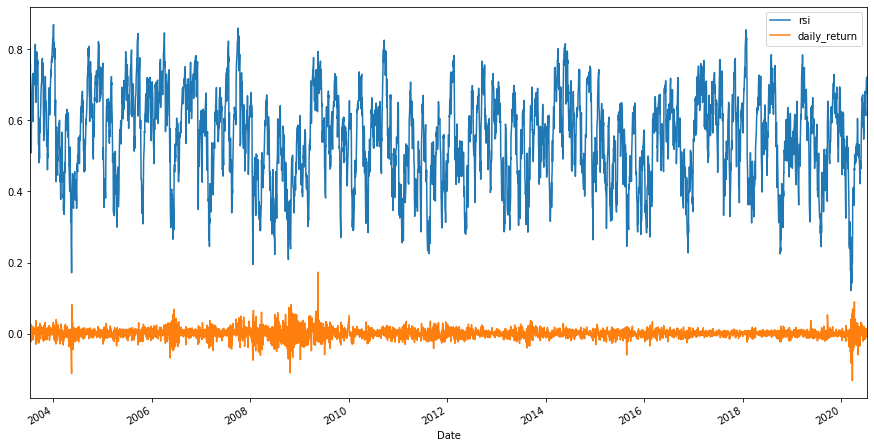

In [41]:
fig=plt.figure(figsize=(15,8))
(df["rsi"]/100).plot(legend=True)
df["daily_return"].plot(legend=True)
plt.show()

### feature : range(high - low). And dropping the high and low 

In [42]:
df["range_hig_low"]=df["High"]-df["Low"]

In [43]:
df.drop(["High","Low","Volume","Adj Close"],axis=1,inplace=True)

### Using shift function to set the features 

In [44]:
for i in df.drop('daily_return',axis=1).columns:
    df[i]=df[i].shift()

In [45]:
df.dropna(inplace=True)

In [46]:
df.corr()

Open     Close  daily_return       rsi    SMA_10    SMA_20  \
Open           1.000000  0.999727     -0.037756 -0.062258  0.999071  0.997641   
Close          0.999727  1.000000     -0.037406 -0.055875  0.998865  0.997381   
daily_return  -0.037756 -0.037406      1.000000  0.022371 -0.037655 -0.038438   
rsi           -0.062258 -0.055875      0.022371  1.000000 -0.088743 -0.112071   
SMA_10         0.999071  0.998865     -0.037655 -0.088743  1.000000  0.999291   
SMA_20         0.997641  0.997381     -0.038438 -0.112071  0.999291  1.000000   
SMA_50         0.993410  0.993114     -0.037932 -0.143404  0.995420  0.997414   
SMA_100        0.987670  0.987395     -0.036886 -0.157141  0.989586  0.991770   
SMA_200        0.978985  0.978771     -0.035150 -0.160496  0.980711  0.982774   
log_volume    -0.162672 -0.162985      0.010883 -0.015454 -0.161862 -0.160371   
range_hig_low  0.349149  0.347225     -0.037188 -0.354326  0.365183  0.378460   

                 SMA_50   SMA_100   SMA_200  log_volume  range_hig_low  
Open           0.993410  0.987670  0.978985   -0.162672       0.349149  
Close          0.993114  0.987395  0.978771   -0.162985       0.347225  
daily_return  -0.037932 -0.036886 -0.035150    0.010883      -0.037188  
rsi           -0.143404 -0.157141 -0.160496   -0.015454      -0.354326  
SMA_10         0.995420  0.989586  0.980711   -0.161862       0.365183  
SMA_20         0.997414  0.991770  0.982774   -0.160371       0.378460  
SMA_50         1.000000  0.996817  0.988469   -0.157617       0.398664  
SMA_100        0.996817  1.000000  0.995621   -0.144153       0.411629  
SMA_200        0.988469  0.995621  1.000000   -0.128969       0.416485  
log_volume    -0.157617 -0.144153 -0.128969    1.000000       0.164181  
range_hig_low  0.398664  0.411629  0.416485    0.164181       1.000000

In [47]:
df.reset_index()

Date          Open         Close  daily_return        rsi  \
0    2003-07-15   3704.629883   3720.750000     -0.009248  80.300736   
1    2003-07-16   3719.169922   3686.340088      0.009579  73.510081   
2    2003-07-17   3702.139893   3721.649902     -0.014171  75.793357   
3    2003-07-18   3728.840088   3668.909912     -0.005814  66.641454   
4    2003-07-21   3651.389893   3647.580078     -0.021384  63.266376   
...         ...           ...           ...           ...        ...   
4169 2020-07-06  36025.378906  36021.421875      0.012933  68.527182   
4170 2020-07-07  36313.460938  36487.281250      0.005132  71.150704   
4171 2020-07-08  36660.351562  36674.519531     -0.009421  72.142970   
4172 2020-07-09  36738.378906  36329.011719      0.011249  67.549512   
4173 2020-07-10  36450.691406  36737.691406     -0.003902  70.005405   

            SMA_10        SMA_20        SMA_50       SMA_100       SMA_200  \
0      3640.768970   3569.623474   3305.862788   3214.908191   3190.616847   
1      3648.959985   3582.388977   3319.729590   3218.880691   3193.926797   
2      3660.985986   3596.923474   3334.547788   3223.076790   3197.428646   
3      3663.887988   3607.638965   3348.693984   3226.733689   3200.661946   
4      3666.411987   3615.042969   3362.645586   3230.137490   3203.794446   
...            ...           ...           ...           ...           ...   
4169  35238.099219  34577.814844  32982.784531  33834.744395  36927.740459   
4170  35395.695312  34683.650000  33075.268555  33788.190605  36925.268018   
4171  35520.104297  34819.541406  33182.214531  33741.875488  36922.913369   
4172  35666.107422  34923.639453  33273.933164  33693.747090  36918.204326   
4173  35855.666406  35083.605469  33366.396602  33651.327793  36916.371377   

      log_volume  range_hig_low  
0       9.961756      21.930176  
1      10.034516      76.699951  
2       9.820106      66.320068  
3       9.998798      89.659912  
4       9.998798      58.500000  
...          ...            ...  
4169    9.711116     237.832031  
4170   10.012342     407.640625  
4171    9.933046     452.179688  
4172   10.118599     594.257812  
4173    9.764225     384.000000  

[4174 rows x 12 columns]

### Defining X and Y

In [48]:
x=df.reset_index().drop(["daily_return","Date"],axis=1)

In [49]:
y=df["daily_return"]

In [50]:
def y_change(y):
    if y>0:
        return 1
    else:
        return 0

In [51]:
y=y.apply(y_change)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rcf=RandomForestClassifier()

In [62]:
parameters={"n_estimators":[5,50,250],"max_depth":[2,4,8,16,32,None]}

In [63]:
cv=GridSearchCV(rcf,parameters,cv=5)

In [64]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 50, 250]})

In [67]:
prediction=cv.best_estimator_.predict(X_test)

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.48      0.44      0.46       633
           1       0.55      0.59      0.57       745

    accuracy                           0.52      1378
   macro avg       0.51      0.51      0.51      1378
weighted avg       0.52      0.52      0.52      1378



### GradientBoosting trees

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
gbc=GradientBoostingClassifier()

In [74]:
parameters={"n_estimators":[5,50,250,500],"max_depth":[1,3,5,7,9],"learning_rate":[0.01,0.1,1,10,100]}

In [75]:
cv=GridSearchCV(gbc,parameters,cv=5)

In [76]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [79]:
predictions_gbc=cv.best_estimator_.predict(X_test)

In [80]:
print(classification_report(y_test,predictions_gbc))

              precision    recall  f1-score   support

           0       0.46      0.42      0.43       633
           1       0.54      0.58      0.56       745

    accuracy                           0.50      1378
   macro avg       0.50      0.50      0.50      1378
weighted avg       0.50      0.50      0.50      1378

